In [61]:
import numpy as np
import pandas as pd
import altair as alt
from vega_datasets import data

countries = alt.topo_feature(data.world_110m.url, 'countries')

# download from https://bl.ocks.org/mbostock/raw/4090846/world-country-names.tsv
some_data = pd.read_csv('world-country-names.tsv', sep='\t')  
some_data.head()

,id,name
0,-1,Northern Cyprus
1,-2,Kosovo
2,-3,Somaliland
3,4,Afghanistan
4,8,Albania


In [62]:
some_data['rate'] = np.random.random(len(some_data))
some_data.head()

,id,name,rate
0,-1,Northern Cyprus,0.893815
1,-2,Kosovo,0.033565
2,-3,Somaliland,0.733582
3,4,Afghanistan,0.383214
4,8,Albania,0.411592


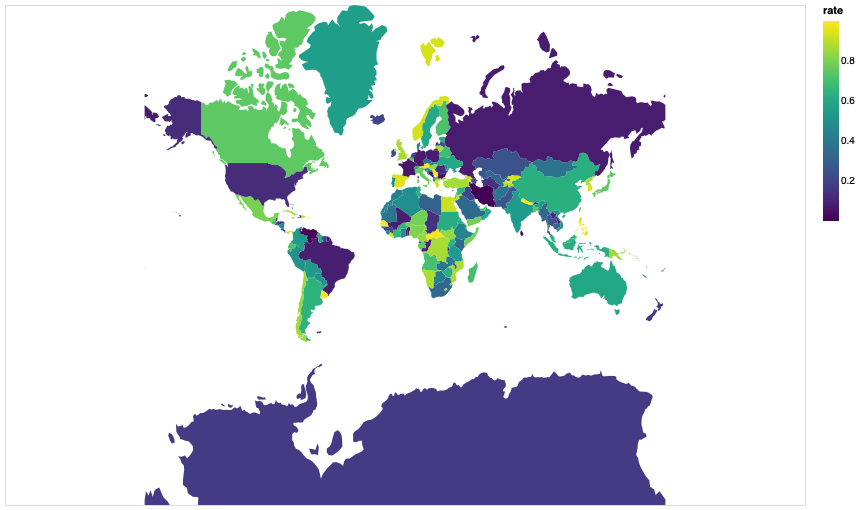

In [63]:
alt.Chart(countries).mark_geoshape().encode(
    color='rate:Q'
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(some_data, 'id', ['rate'])
).properties(
    width=800,
    height=500
).project('mercator')